In [2]:
from prolif.io.protein_helper import ProteinHelper

protein_helper = ProteinHelper(
    [
        {
            "MSE": {"SMILES": "C[Se]CC[CH](N)C=O"},
            "MG": {"SMILES": "[Mg++]"},
            "AGS": {
                "SMILES": (
                    "c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]"
                    "([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=S)(O)O)O)O)N"
                )
            },
        }
    ]
)

In [3]:
import MDAnalysis as mda

u = mda.Universe("./test_data/5da9.pdb")
u.select_atoms("protein or water").write("./test_data/5da9_protein.pdb")
u.select_atoms("not protein and not water").write("./test_data/5da9_ligand.pdb")

/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [ ]:
from prolif.molecule import Molecule

protein_mol = protein_helper.standardize_protein("./test_data/5da9_protein.pdb")

/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/prolif/io/protein_helper.py:161: UserWarning: Could not guess the forcefield based on the residue names. CYS is assigned to neutral CYS (charge = 0).
  standardized_resname = self.convert_to_standard_resname(


In [5]:
protein_mol.residues.__len__()

992

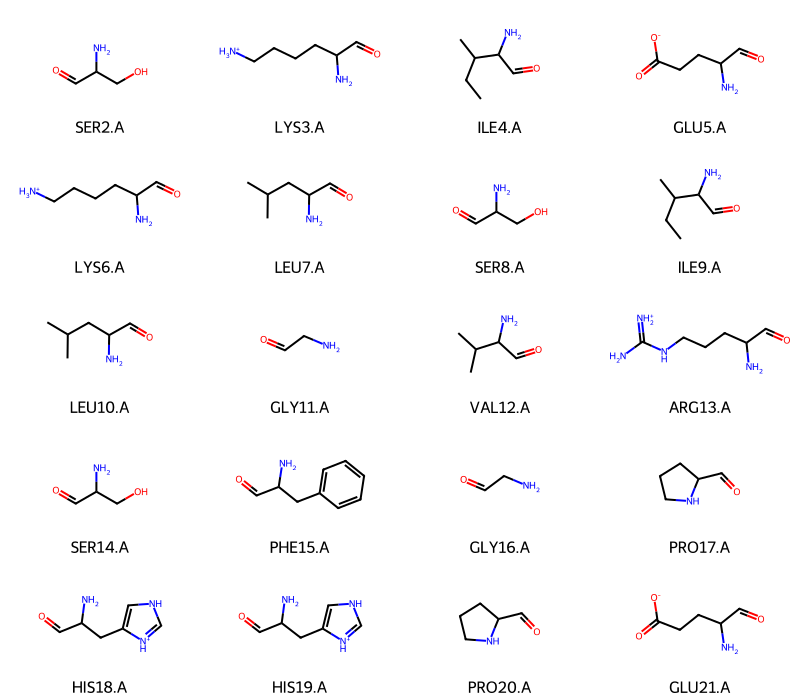

In [6]:
import prolif as plf

plf.display_residues(protein_mol, slice(0, 20), sanitize=False)

In [7]:
ligands = protein_helper.standardize_protein("./test_data/5da9_ligand.pdb")

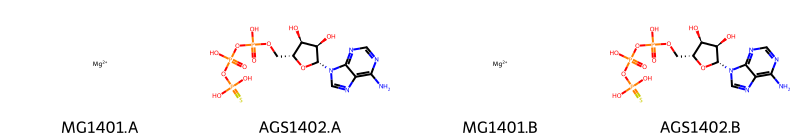

In [8]:
plf.display_residues(ligands, slice(0, 20), sanitize=False)

In [8]:
ligand = Molecule(ligands[1])

In [ ]:
fp = plf.Fingerprint(["ImplicitHBDonor", "ImplicitHBAcceptor"], count=True)
fp.run_from_iterable([ligand], protein_mol, progress=False)
df = fp.to_dataframe().T

In [10]:
df

Frame                                   0
ligand    protein   interaction          
AGS1402.A ARG13.A   ImplicitHBAcceptor  1
          ASN36.A   ImplicitHBAcceptor  1
          GLY37.A   ImplicitHBDonor     1
                    ImplicitHBAcceptor  1
          SER38.A   ImplicitHBDonor     1
                    ImplicitHBAcceptor  2
          GLY39.A   ImplicitHBAcceptor  1
          LYS40.A   ImplicitHBDonor     1
                    ImplicitHBAcceptor  2
          THR41.A   ImplicitHBAcceptor  3
          THR42.A   ImplicitHBAcceptor  2
          ALA64.A   ImplicitHBDonor     1
          ASP68.A   ImplicitHBAcceptor  1
          SER1208.B ImplicitHBDonor     1
                    ImplicitHBAcceptor  1
          GLY1210.B ImplicitHBAcceptor  1
          GLN1211.B ImplicitHBAcceptor  1

In [11]:
view = fp.plot_lignetwork(ligand, kind="frame", frame=0, display_all=False)
view

In [ ]:
view = fp.plot_3d(ligand, protein_mol, frame=0, display_all=True)
view.setStyle(
    {
        "resn": "HOH",
    },
    {"sphere": {"radius": 0.5, "color": "red"}},
)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.